In [21]:
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import auc
from matplotlib import pyplot as plt
import numpy as np
import random

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
X_train = pd.read_csv('./training.csv')
y_train = pd.read_csv('./testing.csv')

In [24]:
X_train.head()

,Sample,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,percussiv8,harmonic9,percussiv9,harmonic10,percussiv10,harmonic11,percussiv11,harmonic12,percussiv12,class
0,a0001.wav,-790.88150,35.346480,29.868963,22.915094,16.704622,12.799420,11.525692,12.023934,12.846399,...,0.600185,0.738516,0.647035,0.711224,0.605806,0.602629,0.563089,0.596157,0.481607,1
1,a0001.wav,-800.17773,36.829205,32.262160,26.007862,19.561516,14.184357,10.528907,8.553568,7.722000,...,0.654648,0.585089,0.675702,0.648892,0.674852,0.470988,0.600697,0.441939,0.560367,1
2,a0001.wav,-785.04065,38.343674,35.874480,32.087100,27.407870,22.322060,17.299654,12.736375,8.917072,...,0.562948,0.735803,0.557726,0.708788,0.564459,0.633074,0.593979,0.644294,0.666489,1
3,a0001.wav,-797.87540,22.834503,21.257290,18.933811,16.241505,13.572474,11.246131,9.448731,8.214036,...,0.645016,0.583281,0.622745,0.599158,0.607597,0.564188,0.614927,0.578935,0.678930,1
4,a0001.wav,-810.88830,20.403090,19.041300,17.012943,14.621115,12.189124,9.993263,8.212915,6.909382,...,0.574938,0.315265,0.527949,0.298029,0.498804,0.264558,0.567844,0.265852,0.601594,1


In [34]:
list_to_drop = [f'harmonic{i}' for i in range(1,13)]
print(list_to_drop)

['harmonic1', 'harmonic2', 'harmonic3', 'harmonic4', 'harmonic5', 'harmonic6', 'harmonic7', 'harmonic8', 'harmonic9', 'harmonic10', 'harmonic11', 'harmonic12']


In [35]:
X_train.drop(list_to_drop, axis = 1, inplace=True)
y_train.drop(list_to_drop, axis = 1 , inplace=True)

In [36]:
X_test = X_train['class']
y_test = y_train['class']
X_train = X_train.drop(['class' , 'Sample'] , axis = 1)
y_train = y_train.drop(['class' , 'Sample'] , axis = 1)

In [37]:
X_train.head(5)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,percussiv3,percussiv4,percussiv5,percussiv6,percussiv7,percussiv8,percussiv9,percussiv10,percussiv11,percussiv12
0,-790.88150,35.346480,29.868963,22.915094,16.704622,12.799420,11.525692,12.023934,12.846399,12.752587,...,0.521811,0.584468,0.611693,0.602053,0.574912,0.600185,0.647035,0.605806,0.563089,0.481607
1,-800.17773,36.829205,32.262160,26.007862,19.561516,14.184357,10.528907,8.553568,7.722000,7.354673,...,0.607714,0.570372,0.586046,0.592034,0.604351,0.654648,0.675702,0.674852,0.600697,0.560367
2,-785.04065,38.343674,35.874480,32.087100,27.407870,22.322060,17.299654,12.736375,8.917072,6.000667,...,0.812101,0.762499,0.722133,0.640476,0.561324,0.562948,0.557726,0.564459,0.593979,0.666489
3,-797.87540,22.834503,21.257290,18.933811,16.241505,13.572474,11.246131,9.448731,8.214036,7.445949,...,0.623005,0.671953,0.637164,0.639442,0.643310,0.645016,0.622745,0.607597,0.614927,0.678930
4,-810.88830,20.403090,19.041300,17.012943,14.621115,12.189124,9.993263,8.212915,6.909382,6.035825,...,0.598374,0.579964,0.691152,0.572365,0.543006,0.574938,0.527949,0.498804,0.567844,0.601594


In [29]:
X_train = X_train.iloc[ : , 44 : ]
y_train = y_train.iloc[ : , 44 : ]

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [56]),
    keras.layers.Dense(units = 150 , activation = 'relu'),#, kernel_initializer = keras.initializers.GlorotNormal()), #, kernel_regularizer = keras.regularizers.l2(0.03)),
    keras.layers.Dense(units = 200 , activation = keras.layers.LeakyReLU()),# , kernel_initializer = keras.initializers.GlorotNormal()),# , kernel_regularizer = keras.regularizers.l2(0.02)),
    keras.layers.Dense(units = 250 , activation = keras.layers.LeakyReLU()),#, kernel_initializer = keras.initializers.GlorotNormal()),# , kernel_regularizer = keras.regularizers.l2(0.05)),
    keras.layers.Dense(units = 250 , activation = keras.layers.LeakyReLU()),#, kernel_initializer = keras.initializers.GlorotNormal()),
    keras.layers.Dense(units = 1 , activation = 'sigmoid')#, kernel_initializer = keras.initializers.random_normal())
])

In [12]:
stop_early =  keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience=10 , min_delta=0.01);

In [40]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), optimizer = 'Nadam', metrics = ['accuracy'] )

In [41]:
history = model.fit(X_train , X_test, epochs = 250, validation_split = 0.1 , callbacks = [stop_early])

Epoch 1/250
1341/1341 [==============================] - 11s 6ms/step - loss: 0.3210 - accuracy: 0.8483 - val_loss: 0.5070 - val_accuracy: 0.7900
Epoch 2/250
1341/1341 [==============================] - 7s 5ms/step - loss: 0.2816 - accuracy: 0.8704 - val_loss: 0.4628 - val_accuracy: 0.6991
Epoch 3/250
1341/1341 [==============================] - 7s 5ms/step - loss: 0.2736 - accuracy: 0.8741 - val_loss: 0.4561 - val_accuracy: 0.6935
Epoch 4/250
1341/1341 [==============================] - 7s 5ms/step - loss: 0.2687 - accuracy: 0.8778 - val_loss: 0.4635 - val_accuracy: 0.7379
Epoch 5/250
1341/1341 [==============================] - 7s 5ms/step - loss: 0.2644 - accuracy: 0.8796 - val_loss: 0.4336 - val_accuracy: 0.7440
Epoch 6/250
1341/1341 [==============================] - 8s 6ms/step - loss: 0.2627 - accuracy: 0.8804 - val_loss: 0.4681 - val_accuracy: 0.7337
Epoch 7/250
1341/1341 [==============================] - 7s 6ms/step - loss: 0.2599 - accuracy: 0.8816 - val_loss: 0.4266 - val_a

639/639 [==============================] - 2s 3ms/step
[0.81 0.75 0.8  ... 0.1  0.02 0.18]
[1 1 1 ... 0 0 0]
[[14380   746]
 [ 2886  2433]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     15126
           1       0.77      0.46      0.57      5319

    accuracy                           0.82     20445
   macro avg       0.80      0.70      0.73     20445
weighted avg       0.82      0.82      0.81     20445



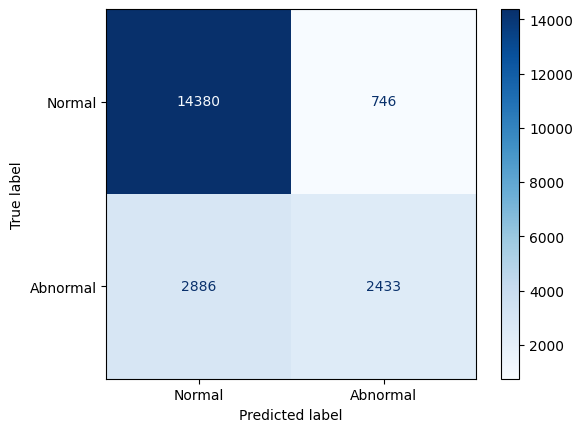

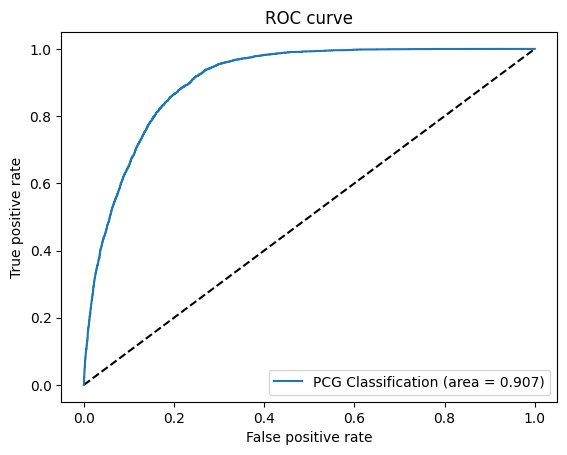

In [42]:
y_pred_keras = model.predict(y_train).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
y_pred_keras = y_pred_keras.flatten()
print(y_pred_keras.round(2))
y_pred = np.where(y_pred_keras > 0.5, 1, 0)
print(y_pred)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
labels = ["Normal", "Abnormal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='PCG Classification (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [16]:
import pickle
file = open('./Model 7/model.pkl' , 'wb')
pickle.dump(model , file)
file.close()

INFO:tensorflow:Assets written to: ram://1a96c16d-ed2c-4739-8898-5ff33e33c595/assets


INFO:tensorflow:Assets written to: ram://1a96c16d-ed2c-4739-8898-5ff33e33c595/assets


In [13]:
a = int('012')

In [14]:
a


12

In [15]:
type(a)

int